1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
Number of convolutional layers found: 16
Layer names: ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_conv4', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_conv4', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_conv4']


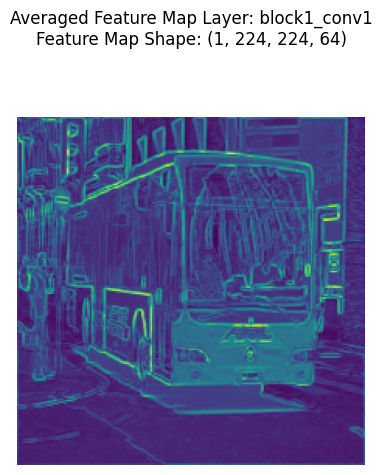

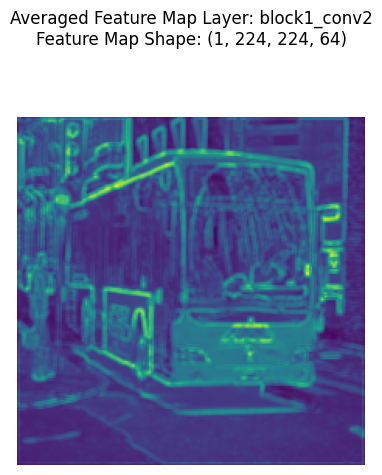

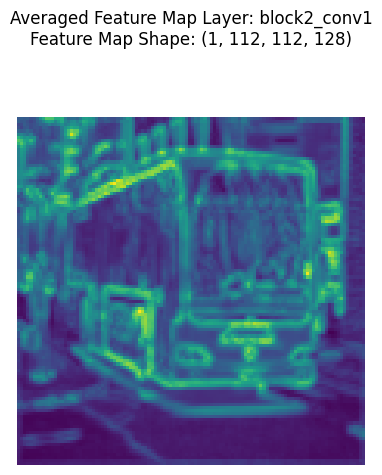

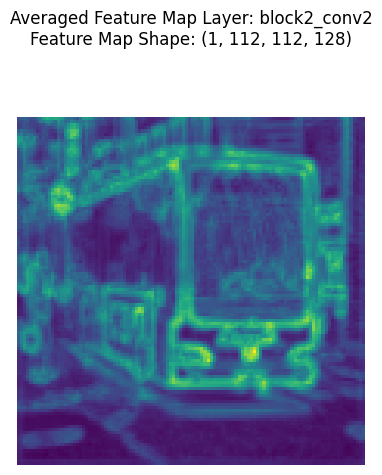

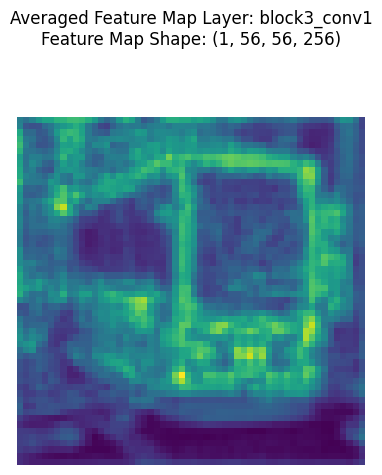

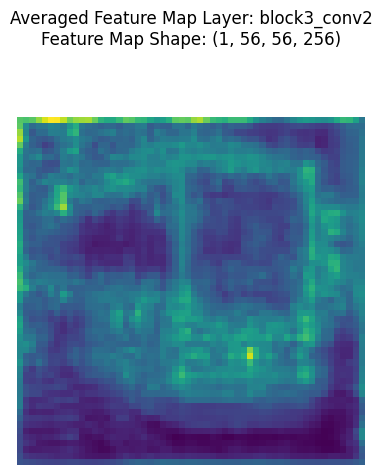

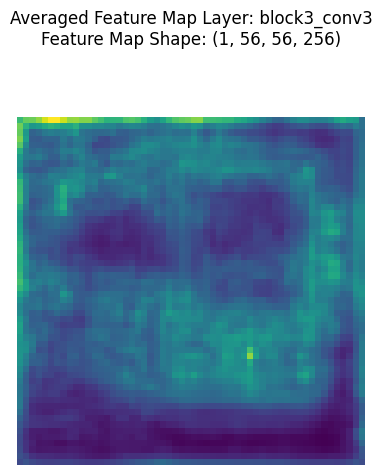

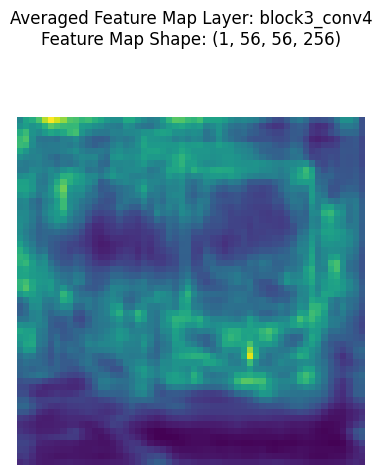

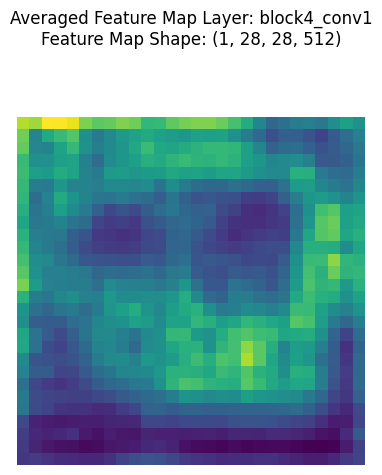

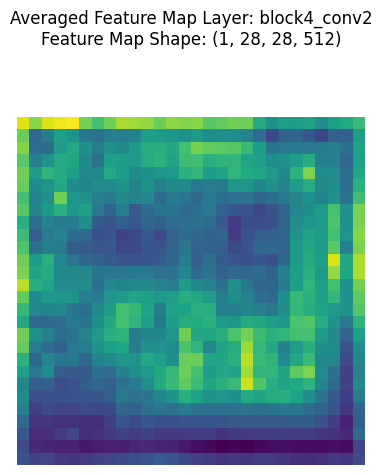

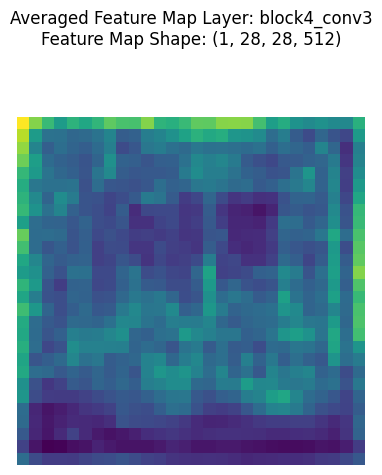

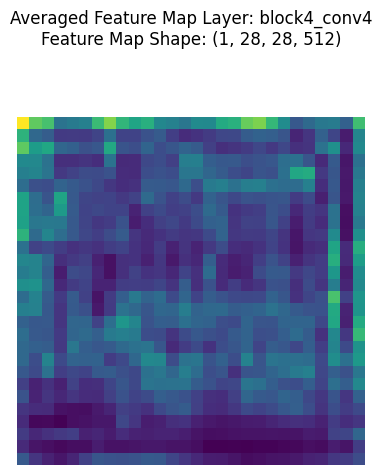

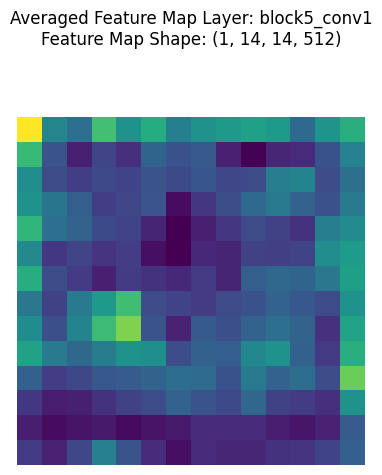

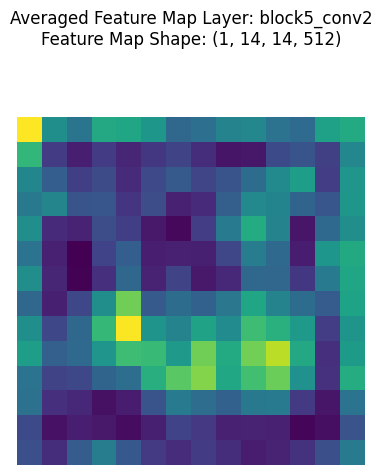

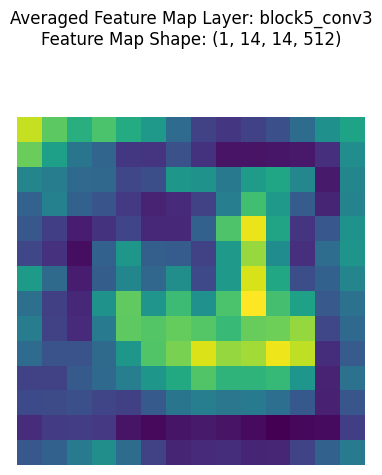

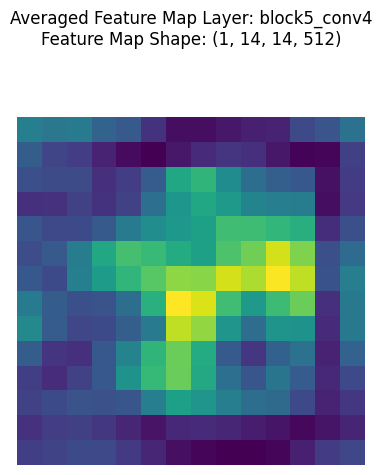

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# --- Your Provided Code ---
IMG_SHAPE = (224, 224, 3)

# Pre-trained ImageNet weights give the perceptual signal its “visual prior”.
base = VGG19(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights=None,  
    pooling=None
)

base.load_weights("/Users/saptarshimallikthakur/Desktop/Extraas/Text2IMG/Dall-E/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5")
base.trainable = False   # freeze

# Load and preprocess the image
img = image.load_img('/Users/saptarshimallikthakur/Desktop/Extraas/Towards VLM/VLM/GQA/resized_images/2328814.jpg', target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = preprocess_input(img_tensor)

# --- Step 2 & 3: Create the Visualization Model ---

# Get the outputs of all convolutional layers
layer_outputs = [layer.output for layer in base.layers if 'conv' in layer.name]
layer_names = [layer.name for layer in base.layers if 'conv' in layer.name]

# Create a new model that will return these outputs
visualization_model = tf.keras.models.Model(inputs=base.input, outputs=layer_outputs)

# --- Step 4: Get the Feature Maps ---
# Run the image through the model to get the feature maps
feature_maps = visualization_model.predict(img_tensor)

print(f"Number of convolutional layers found: {len(feature_maps)}")
print(f"Layer names: {layer_names}")


# # --- Step 5: Visualize the Feature Maps ---

# def process_and_plot_feature_maps(layer_name, feature_map_for_layer):
#     """Normalizes and plots the feature maps for a single layer."""
#     n_features = feature_map_for_layer.shape[-1]  # Number of features in the feature map
    
#     # Limit the number of features to plot for clarity (e.g., max 64)
#     n_display = min(n_features, 64)
    
#     size = feature_map_for_layer.shape[1]  # The size of the feature map (height/width)
    
#     # Calculate the grid size for plotting
#     n_cols = 8
#     n_rows = n_display // n_cols
    
#     # Create the plot
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 1.5, n_rows * 1.5))
#     fig.suptitle(f"Feature Maps for Layer: {layer_name}\nShape: {feature_map_for_layer.shape}", fontsize=16)

#     for i in range(n_display):
#         # Get the feature map for the i-th filter
#         x = feature_map_for_layer[0, :, :, i]
        
#         # Post-process the feature to make it visually palatable
#         x -= x.mean()
#         x /= (x.std() + 1e-5) # Add epsilon to avoid division by zero
#         x *= 64
#         x += 128
#         x = np.clip(x, 0, 255).astype('uint8')
        
#         # Get the correct subplot coordinates
#         row = i // n_cols
#         col = i % n_cols
        
#         # Plot the feature map
#         axes[row, col].imshow(x, aspect='auto', cmap='viridis')
#         axes[row, col].axis('off')

#     # Clean up empty subplots
#     for i in range(n_display, n_rows * n_cols):
#         row = i // n_cols
#         col = i % n_cols
#         fig.delaxes(axes[row, col])

#     plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
#     plt.show()

# # Iterate through the layers and their corresponding feature maps and plot them
# for name, fmap in zip(layer_names, feature_maps):
#     process_and_plot_feature_maps(name, fmap)



# --- Step 5: Visualize the Averaged Feature Map for Each Layer ---

def plot_single_averaged_feature_map(layer_name, feature_map_for_layer):
    """Averages a layer's feature maps and plots it next to the original image."""
    
    # The feature map has a shape of (1, height, width, n_filters).
    # We take the mean across the last axis (the filters) to get a 2D map.
    averaged_feature_map = np.mean(feature_map_for_layer[0], axis=-1)
    
    # Plot the averaged feature map as a heatmap
    im = plt.imshow(averaged_feature_map, cmap='viridis')
    plt.suptitle(f"Averaged Feature Map Layer: {layer_name}\nFeature Map Shape: {feature_map_for_layer.shape}")
    plt.axis('off')
    
    plt.tight_layout(rect=[0, 0, 1, 0.9]) # Adjust layout for suptitle
    plt.show()


# Iterate through the layers and their corresponding feature maps and plot them
for name, fmap in zip(layer_names, feature_maps):
    plot_single_averaged_feature_map(name, fmap)